# Datasets

`torchvision` is the development of a more basic `torch`. So it's datasets have some features that will be described here.

In [75]:
import torch
from torchvision.datasets import ImageFolder

import matplotlib.pyplot as plt
from torchvision.utils import make_grid

import torchvision.transforms as T

## Image folder

It's really common to work with data structured like this: there's `folder_1`, `folder_2`, ..., `folder_n`, so there are specific folders for each class. And each folder contains images that belong to that class. There are prepared folders that show what it might look like. The following cell shows the `tree` of this folder.

In [22]:
%%bash
tree datasets_files/image_dataset

datasets_files/image_dataset
├── class1
│   ├── 1.png
│   ├── 2.png
│   ├── 3.png
│   ├── 4.png
│   ├── 5.png
│   ├── 6.png
│   ├── 7.png
│   ├── 8.png
│   └── 9.png
└── class2
    ├── 1.png
    ├── 2.png
    ├── 3.png
    ├── 4.png
    ├── 5.png
    ├── 6.png
    ├── 7.png
    ├── 8.png
    └── 9.png

2 directories, 18 files


So you can use `torchvision.datasets.ImageFolder` to load this type of file. In the next cell, `ImageFolder` has been applied to the folder from the previous cell. The firls element of the retrieved dataset is also displayed:

In [33]:
img_dataset = ImageFolder("datasets_files/image_dataset")
display(img_dataset[0])

(<PIL.Image.Image image mode=RGB size=1024x1024 at 0x7FECA89EC5B0>, 0)

It should support most of the features of `torchvision.datasets.vision.VisionDataset' because it's an ancestor of that class. The next cell shows the list of ancestors:

In [34]:
display(ImageFolder.mro())

[torchvision.datasets.folder.ImageFolder,
 torchvision.datasets.folder.DatasetFolder,
 torchvision.datasets.vision.VisionDataset,
 torch.utils.data.dataset.Dataset,
 typing.Generic,
 object]

And finally, here are some visualisations of picuteres in the classroom, to make sure that there are images and perhaps show some features for manipulating with them.

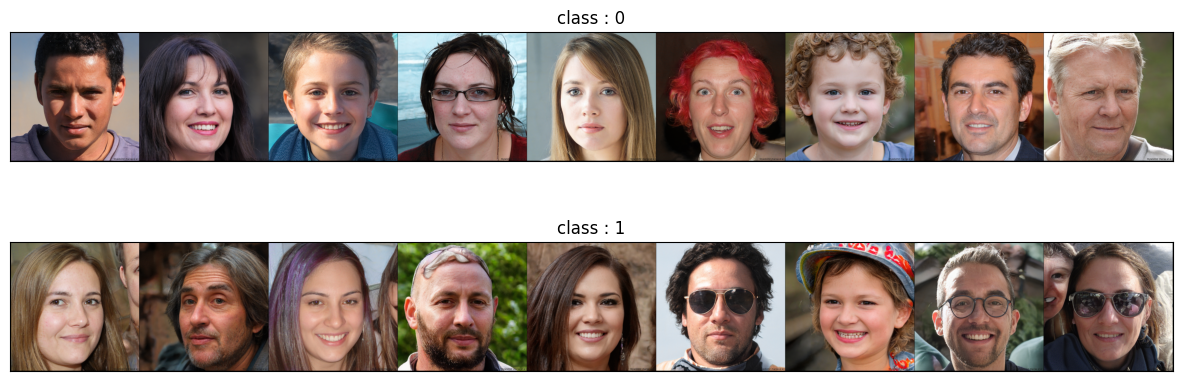

In [74]:
separated = {}
for v in img_dataset:
    if not(v[1] in separated):
        separated[v[1]] = []
    separated[v[1]].append(v[0])

classes_count = len(separated)
plt.figure(figsize = (15, 5))

for i, (class_name, class_picks) in enumerate(separated.items()):
    plt.subplot(classes_count, 1, i + 1)

    plt.title(f"class : {class_name}")
    plt.imshow(T.ToPILImage()(
        make_grid(
            [T.ToTensor()(pic) for pic in class_picks], 
            nrow=len(class_picks)
        )
    ))
    plt.xticks([]);plt.yticks([])